In [96]:
import pandas as pd
import numpy as np

# Data Prep 

In [110]:
# education df
edu = pd.read_excel('clean_education.xlsx', dtype = {'county_fips': str})
edu.head()

,Unnamed: 0,ind_id,ind_definition,estimate,geotype,geotypevalue,geoname,region_name,region_code,county_fips
0,9,355,Percent of population age 25 and up with a fou...,21.1,CD,607192260,Ontario CCD,Southern California,14,06071
1,10,355,Percent of population age 25 and up with a fou...,0.1,CD,603593280,Susanville CCD,Northeast Sierra,6,06035
2,11,355,Percent of population age 25 and up with a fou...,17.0,CD,607192100,Newberry-Baker CCD,Southern California,14,06071
3,12,355,Percent of population age 25 and up with a fou...,19.9,CD,609792940,Santa Rosa CCD,Bay Area,1,06097
4,13,355,Percent of population age 25 and up with a fou...,28.3,CD,600190020,Alameda CCD,Bay Area,1,06001


In [98]:
# housing df
house = pd.read_excel('clean_housing.xlsx',dtype = {'county_fips': str})
house.head()

,Unnamed: 0,ind_id,ind_definition,percent,burden,geotype,income_level,geotypevalue,geoname,region_name,region_code,county_fips
0,813,106,Percent of households spending more than 30% (...,17.217629,> 50% of monthly household income consumed by ...,CO,Monthly household income at all levels of HUD-...,6001,Alameda,Bay Area,1,06001
1,823,106,Percent of households spending more than 30% (...,22.556391,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001
2,829,106,Percent of households spending more than 30% (...,17.071468,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001
3,835,106,Percent of households spending more than 30% (...,28.111467,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001
4,841,106,Percent of households spending more than 30% (...,23.745072,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001


In [159]:
# group house set by county fips and calculate mean so that there are no duplicate counties for choropleth
mean_house = house[['county_fips', 'percent']].groupby(['county_fips']).mean()
# do same thing for education data
mean_edu = edu[['county_fips', 'estimate']].groupby(['county_fips']).mean()
mean_house

,percent
county_fips,
06001,17.670593
06003,13.181527
06005,18.003067
06007,18.358014
06009,18.084347
06011,20.144205
06013,20.219793
06015,15.191752
06017,22.063858


# Choropleth

In [108]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

values = mean_house['percent']
fips = mean_house.index

endpts = list(np.mgrid[values.min():values.max():4j])
colorscale = ["#eff3ff", "#bdd7e7", "#6baed6", "#3182bd", "#08519c"]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Percentage of High Housing Burden',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
)
fig.layout.template = None
fig.show()


C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

In [109]:
values = mean_edu['estimate']
fips = mean_edu.index

endpts = list(np.mgrid[values.min():values.max():4j])  # Reverse the order
colorscale = ["#eff3ff", "#bdd7e7", "#6baed6", "#3182bd", "#08519c"]


fig2 = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Percentage of People in Higher Education',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
)
fig2.layout.template = None
fig2.show()



C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

# Heatmap

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
means_combined = pd.merge(mean_house, mean_edu, on='county_fips', how='inner').reset_index().rename(columns={'percent': 'Housing Burden', 'estimate': 'Higher Education', 'county_fips':'County'})
means_combined.head()

,County,Housing Burden,Higher Education
0,06001,17.670593,39.984715
1,06003,13.181527,31.956229
2,06005,18.003067,20.342844
3,06007,18.358014,21.551367
4,06009,18.084347,23.150556


Text(0.5, 1.0, 'Correlation Heatmap: Mean Higher Education vs Mean Housing Burden Across Counties')

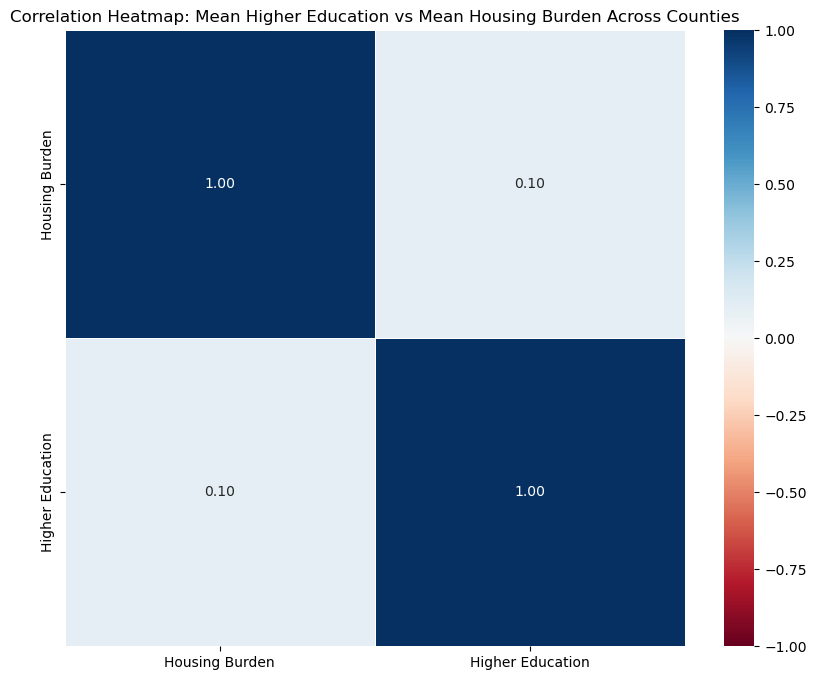

In [163]:
plt.figure(figsize=(10, 8))

# Create a heatmap
corr = means_combined[['Housing Burden', 'Higher Education']].corr()
sns.heatmap(corr, annot=True, cmap="RdBu", fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

# Set the title and show the plot
plt.title('Correlation Heatmap: Mean Higher Education vs Mean Housing Burden Across Counties')